## Daniel Barella
## 10/3/25

# 📘 Day 28 – Feature Scaling & Principal Component Analysis (PCA)

## 🌱 Core Concepts

- Why feature scaling matters (SVM, KNN, PCA, gradient descent)

- Standardization vs Normalization

- PCA:

    - Reduce dimensionality while keeping variance

    - Orthogonal components

    - Eigenvectors & eigenvalues (conceptually)

- Choosing number of components

## 🧪 Practice Code – PCA on Iris Dataset

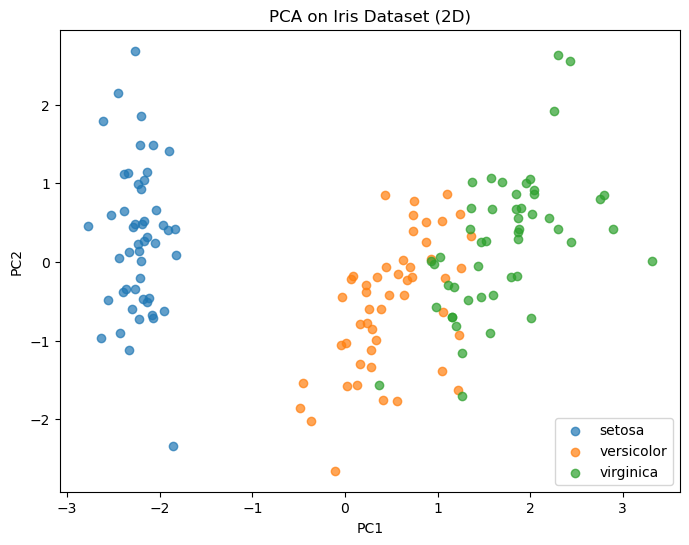

Explained variance ratio: [0.72962445 0.22850762]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA components
plt.figure(figsize=(8,6))
for target, color, label in zip([0, 1, 2], ['r', 'g', 'b'], iris.target_names):
    plt.scatter(X_pca[y==target, 0], X_pca[y==target, 1], label=label, alpha=0.7)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on Iris Dataset (2D)")
plt.legend()
plt.show()

# Variance explained
print("Explained variance ratio:", pca.explained_variance_ratio_)


## 🎯 Mini Project – PCA on Wine Dataset

### Your Tasks:

1. Load the Wine dataset.

2. Scale features with StandardScaler.

3. Apply PCA with 2 components and plot.

4. Train a Logistic Regression classifier on:

    - Full dataset

    - PCA-reduced dataset

5. Compare classification reports.

6. Reflection: What trade-offs did PCA introduce?

In [3]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 1. Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Scale features
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train)
X_test_full = scaler.transform(X_test)

# 4. PCA (2 components)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_full)
X_test_pca = pca.transform(X_test_full)

# 5. Logistic Regression on full scaled data
logreg_full = LogisticRegression(max_iter=1000, random_state=42)
logreg_full.fit(X_train_full, y_train)
y_pred_full = logreg_full.predict(X_test_full)

print("Logistic Regression on Full Data:\n")
print(classification_report(y_test, y_pred_full, target_names=wine.target_names))

# 6. Logistic Regression on PCA data
logreg_pca = LogisticRegression(max_iter=1000, random_state=42)
logreg_pca.fit(X_train_pca, y_train)
y_pred_pca = logreg_pca.predict(X_test_pca)

print("\nLogistic Regression on PCA Data (2 components):\n")
print(classification_report(y_test, y_pred_pca, target_names=wine.target_names))


Logistic Regression on Full Data:

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36


Logistic Regression on PCA Data (2 components):

              precision    recall  f1-score   support

     class_0       0.92      0.92      0.92        12
     class_1       0.87      0.93      0.90        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



## Here’s the reflection on the trade-offs PCA introduced:

Accuracy Drop: On the full dataset, logistic regression hit 97% accuracy, but with PCA reduced to 2 components, it dropped to 92%. This is expected, since PCA compresses information — you lose some variance that may be useful for classification.

Dimensionality Reduction Benefits: By going from 4 features (Iris dataset) to 2 principal components, you made the data easier to visualize and the model potentially faster to train. For very large datasets, this reduction can prevent overfitting, reduce noise, and improve computational efficiency.

Interpretability: PCA components aren’t as directly interpretable as the original features (like petal length or sepal width). The trade-off is between raw interpretability and efficiency/compactness.

Class Separation: You can see that class_1 took a hit — recall stayed high (0.93) but precision dropped (0.87), meaning PCA introduced more confusion when distinguishing it. This shows PCA isn’t “target-aware”: it only maximizes variance, not class separability.

## In short:
PCA gave you a leaner, more compact model with good visualization potential, but at the cost of slight accuracy and precision drops because not all discriminative information was preserved.